In [ ]:
!pip install lasio
!pip install diptest
import numpy as np
import pandas as pd
import lasio
import matplotlib.pyplot as plt
import seaborn as sns
import os
import diptest

In [19]:
folder_names = ['il_mod', 'k', 'p']
list_of_uniform_test = []
for folder in folder_names:
  for las_curve in os.listdir(f'LasCurves/{folder}'):
    some_las = lasio.read(f'LasCurves/{folder}/{las_curve}')
    las_df = some_las.df()
    vals = np.histogram(las_df[some_las.keys()[1]], bins = 30)
    distr = vals[0]
    res = diptest.diptest(distr)[1]
    list_of_uniform_test.append(res)

In [20]:
list_of_uniform_test = np.array(list_of_uniform_test)

In [22]:
len(list_of_uniform_test[list_of_uniform_test > 0.05])

75

In [13]:
my_curve = lasio.read(f"LasCurves/il_mod/...")
curve_df = my_curve.df()
curve_df = curve_df.reset_index()

In [ ]:
curve_df

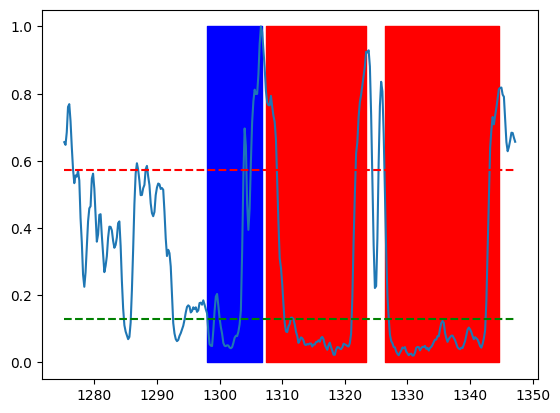

In [16]:
plt.plot(curve_df["DEPTH"],curve_df[my_curve.keys()[1]])
plt.plot(curve_df["DEPTH"], curve_df["SAND_LEVEL"], 'g--')
plt.plot(curve_df["DEPTH"], curve_df["CLAY_LEVEL"], 'r--')
plt.fill_between(curve_df["DEPTH"], 0, 1, where = curve_df["FACIES_CLASSES"] == 1, color = 'red')
plt.fill_between(curve_df["DEPTH"], 0, 1, where = curve_df["FACIES_CLASSES"] == 2, color = 'blue')